In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import xspec as x
import os

#%matplotlib notebook

Defining functions to draw $E \ (T)$:

In [2]:
def f(temperature, eMean, tList): 
    
    # <E> = f(T)
    #returns energy
    
    return eMean[np.argmin(np.abs(tList - temperature))]

    
def f_inv(energy, eMean, tList): 
    
    # T = f^(-1) (<E>)
    #returns temperature
    
    return tList[np.argmin(np.abs(eMean - energy))]
    
    
def get_data(dataName, show_table=False):
    
    # extracts data obtained from stats.sh
    # dataName is stats_NN.dat

    headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    table = pd.read_csv(dataName, sep = ' ', names = headers)
    
    # adding column with E_mean
    
    table['$E_{mean}$'] = table['ecs']/table['cs']
    
    if show_table:
        display(table)
        
    # returns table as numpy array (?)
    
    return table.to_numpy().astype(float)
    

def plot_E_T(dataName, spectra_type, telescope):
    
    # plotting <E>(T) as in Fig.2 for given dataName
    # you should add spectra type and telescope name by yourself
    
    # possible values:
    # spectra_type = 'Line' or sectra_type = 'Continuum'
    # telescope = 'Chandra' or telescope = 'SRG/eROSITA'

    #print(dataName)
    #headers = [ 'Flux', 'Abund', 'T', 'z', 'n_H', 'Chnls', '$E_{min}$', '$E_{max}$', '$E_{sum}$', 'cs', 'ecs' ] 
    #table = pd.read_csv(dataName, sep = ' ', names = headers)
    #adding column with E_mean
    #table['$E_{mean}$'] = table['ecs']/table['cs'] 
    #data = table.to_numpy().astype(float)
    
    data = get_data(dataName, show_table=False)
    
    e_mean = data[:,11]
    temp = data[:,2]
    
    # taking first ever values of corresponding characteristics 
    
    #abundance = table['Abund'].to_numpy().astype(float)[0]
    #absorption = table['n_H'].to_numpy().astype(float)[0]
    #redshift = table['z'].to_numpy().astype(float)[0]
    
    abundance = data[0, 1]
    absorption = data[0, 4]
    redshift = data[0, 3]
    
    plt.plot(temp, e_mean, linewidth = 3, label = spectra_type + ', ' + telescope)
    
    plt.ylim(0, 3)
    plt.xlabel('Temperature (keV)', fontsize = 15)
    plt.ylabel('Average energy (keV)', fontsize = 15)
    plt.title(spectra_type + '-dominated spectra (' + telescope + 
              ') \n $n_H =' + str(absorption) + '\cdot 10^{22} \ cm^{-2}$; z = ' + 
              str(redshift), fontsize = 15) # +'; Z = '+str(abundance)+' Solar units')
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xscale('log')
    #plt.yscale('log')
    #plt.grid()
    plt.legend(fontsize = 15, loc=2)

    #return data[:,11], data[:,2]
    #return e_mean, temp
    
def add_T(Tmin, Tmax, dataName):
    
    # adding vertical lines for given temperatures
    # and horizontal lines for corresponding energies
    
    data = get_data(dataName, show_table=False)
    
    eMean = data[:,11]
    tList = data[:,2]
    
    plt.axvline(Tmin, linewidth=3, linestyle="--", color='red')
    plt.axvline(Tmax, linewidth=3, linestyle="--", color='green')
    
    #E_min = e_mean[np.argmin(np.abs(temp - Tmin))]
    #E_max = e_mean[np.argmin(np.abs(temp - Tmax))]
    E_min = f(Tmin, eMean, tList)
    E_max = f(Tmax, eMean, tList)
    
    print('E_max =', round(E_max,2), 'keV')
    print('E_min =', round(E_min,2), 'keV')
    
    plt.axhline(E_min, linewidth=3, linestyle="--", color='red', label='$E_{min}, T_{min}$')
    plt.axhline(E_max, linewidth=3, linestyle="--", color='green', label='$E_{max}, T_{max}$')
    
    plt.legend(fontsize=15, loc = 4)

Построим графики зависимости средних энергий от температуры для различных спектров и телескопов. Эти зависимости получены в результате выполнения скрипта `stats.sh`.

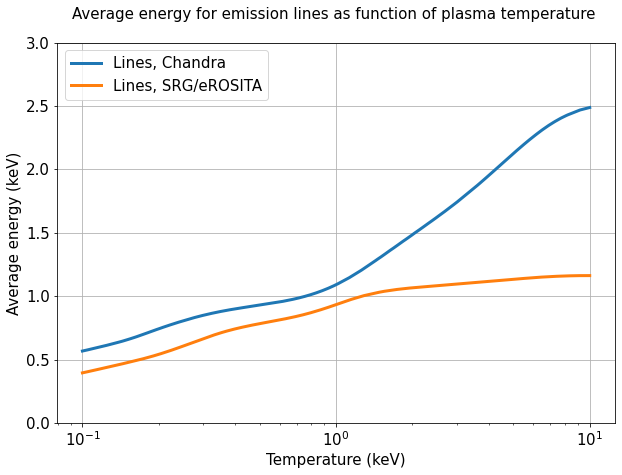

In [3]:
plt.figure(figsize=(10,7))

data_name1 = "data/stats_03.dat"   #'Lines, CH'
data_name2 = "data/stats_11.dat"   #'Cont, CH'
data_name3 = "data/stats_10.dat"   #'Lines, ER'
data_name4 = "data/stats_13.dat"   #'Cont, ER'
data_name5 = "data/stats_07.dat"   #'Lines, ER'
data_name6 = "data/stats_12.dat"   #'Lines, ER'

plot_E_T(data_name1, 'Lines', 'Chandra')
#plot_E_T(data_name2, 'Continuum', 'Chandra')
plot_E_T(data_name3, 'Lines', 'SRG/eROSITA')
#plot_E_T(data_name4, 'Continuum', 'SRG/eROSITA')
#plot_E_T(data_name6, 'Line2', 'er')


#for i in ['02', '03', '05', '08', '14', '15', '04', '16']:
#        dn = "data/stats_"+str(i)+".dat"
#        plot_E_T(dn, str(i), 'Chandra')

        
#plt.xscale('linear')

#add_T(1.0, 3.0, data_name1)

# comment if there is only one E(T)
# this move deletes unique titles
plt.title('Average energy for emission lines as function of plasma temperature \n', fontsize=15)
plt.grid()
#plt.savefig('letter26.10/Fig2.png')
plt.show()

# LINES ONLY

В этом блоке представлен алгоритм для вычисления $T_{spec}$ по спектрам (с преобладанием линий) двухкомпонентной плазмы разными способами и отображения его как на Рис.3 из публикации Вихлинина.

Алгоритм вычисления $T_{spec}$ по графикам $E \ (T)$ согласно формулам (1-3):

In [4]:
def get_Tspec_lines(fmin, Tmin, Tmax, Data):
    
    # derive T_spec from given values 
    # of T_min, T_max, f_min and for given <E>(T)

    E_1 = f(Tmin, Data[:,11], Data[:,2])
    E_2 = f(Tmax, Data[:,11], Data[:,2])

    S_j_1 = Data[np.argmin(np.abs(Data[:,2] - Tmin)), 9]
    S_j_2 = Data[np.argmin(np.abs(Data[:,2] - Tmax)), 9]
    
    #print(Data[np.argmin(np.abs(tList - Tmin)),9], Data[np.argmin(np.abs(tList - Tmax)),9])
    #print()

    num =    fmin*S_j_1*E_1 + (1-fmin)*S_j_2*E_2
    denom =  fmin*S_j_1     + (1-fmin)*S_j_2
    
    #Etot = num/denom
    #Tspec = f_inv(Etot, Data[:,11], Data[:,2])
    #plt.scatter(fmin, Tspec, color="blue")

    return f_inv(num/denom, Data[:,11], Data[:,2])


def plot_Tspec_fmin(Tmin, Tmax, N_fmins, Data, naive=False, lstyle = '-', cline = 'blue'):

    # draw plot like Fig.3

    f_min = np.linspace(0, 1, N_fmins+1)
    
    #naive weighting
    if naive:
        plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')

    T_spec = f_min*0

    for i in range(0, len(f_min)):

        T_spec[i] = get_Tspec_lines(f_min[i], T_min, T_max, Data)

    #print('*************')

    plt.plot(f_min, T_spec, linewidth=2, linestyle = lstyle, color = cline)
    #, label='eq. [1-3]')#'from '+str(T_max)+' to '+str(T_min))

def plot_Tspec_fmin_details():  
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('$f_{min}$', fontsize = 15)
    plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
    line_e = Line2D([], [], label='$T_{spec}$ from eq. [1-3]', color='blue', linestyle='-', linewidth=2)
    dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
    handles.extend([line_n, line_e, dots_f])
    plt.legend(handles=handles, fontsize=15)

## PyXspec

Defining a function that calculates single-temperature fit for two-component plasma (with line-dominated spectra) of temperatures $T_{min}$ and $T_{max}$ and relative contributions $f_{min}$ and $f_{max}$ respectively.

Note: to get rid of trace elements for pure bremsstrahlung use `xset APEC_TRACE_ABUND 0`.

In [74]:
def print_parnames(MODEL):
    
    ncomp = len(MODEL.componentNames)
    for icomp in MODEL.componentNames:
        print (icomp, eval(f'MODEL.{icomp}.parameterNames'))

#mod2fit111 = x.Model("phabs*(apec+const*apec)")
#print_parnames(mod2fit111)


def single_T_fit_lines(T_minnn, T_maxxx, N_fmins, abund, telescope_name, plot=False, Xplot=False):

    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []
    tyui = []

    for l in range(0, N_fmins):
        
        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*(apec+const*apec)+const*(apec+const*apec))')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, 1, 1., T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, abund, 0, 1, 1., T_maxxx, 0, 0, 1)
        #x.AllModels.show()
        mod(7).values =  "-1, 0.0001, -1, -1, 1, 1"
        mod(17).values = "-1, 0.0001, -1, -1, 1, 1"
        mod(7).frozen = True
        mod(17).frozen = True
        mod(8).link = "3"
        mod(10).link = "5"
        mod(11).link = "6"
        mod(18).link = "13"
        mod(20).link = "15"
        mod(21).link = "16"
        x.AllModels.show()
        #x.Plot.show()
        
        x.AllModels.calcFlux('0.7 10.0')
        #print("lines: ", mod.flux)
        flux_list.append(mod.flux[0])
        
        if plot:
            
            asdfg = 0
            
            plt.figure(figsize=(15, 15))
            plt.suptitle(f'\n $T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn}, \ f_{{max}}={f_maxxx}$', fontsize = 25)
            plt.subplot(2,2,1)
            x.Plot("model")
            x.Plot.add = True
            #x.Plot.setID()
            xVals = x.Plot.x()
            modVals = x.Plot.model()
            yAdd1 = x.Plot.addComp(1)
            yAdd2 = x.Plot.addComp(2)
            yAdd3 = x.Plot.addComp(3)
            yAdd4 = x.Plot.addComp(4)
            yAdd12 = [a+b for a,b in zip(yAdd1, yAdd2)]
            yAdd34 = [c+d for c,d in zip(yAdd3, yAdd4)]
            plt.plot(xVals, modVals, linewidth = 3, label='initial model', color='black')
            plt.plot(xVals, yAdd12, linewidth = 2, linestyle = ":", 
                     label=f'$T_{{min}}={T_minnn} \ keV$, \n $f_{{min}}={f_minnn}$', color='red')
            plt.plot(xVals, yAdd34, linewidth = 2, linestyle = "--", 
                     label=f'$T_{{max}}={T_maxxx} \ keV$, \n $f_{{max}}={f_maxxx}$', color='green')
            #plt.plot(xVals, [c+d for c,d in zip(yAdd12, yAdd34)], label='sum')
            #plt.plot(xVals, yAdd3, label='3')
            #plt.plot(xVals, yAdd4, label='4')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            plt.legend(fontsize = 15, loc=1)
            add_plt_fancy()
            #plt.show()
            
            asdfg = np.dot(xVals, modVals)
            tyui.append(asdfg)

        # fake spectrum
        fs = x.FakeitSettings(response = RMF_NAME, 
                                   arf = ARF_NAME, 
                            background = '', 
                              exposure = '40000', 
                            correction = '', 
                          backExposure = '', 
                              fileName = 'fakeit.pha')
        x.AllData.fakeit(nSpectra = 1, 
                         settings = fs, 
                       applyStats = True,
                       filePrefix = "",
                          noWrite = True)
        
        x.AllData.ignore("**-0.1 10.-**")             # IMPORTANT !
        x.Plot("data")
        x.AllData.show()

        # fitting
        mod2fit = x.Model("phabs*(apec+const*apec)")
        mod2fit.setPars(0.01, 1.0, 1.0, 0., 1, 1, 1., 0.0, 0.0, 1)
        mod2fit(6).values = "-1, 0.0001, -1, -1, 1, 1"
        mod2fit(1).frozen = True
        mod2fit(6).frozen = True  
        mod2fit(7).link = "2"
        mod2fit(9).link = "4"
        mod2fit(10).link = "5"
        
        #print_parnames(mod2fit)
        
        #x.Fit.renorm('auto')
        x.Fit.nIterations = 100
        #x.Fit.statMethod = 'cstat'
        # about statistic in xspec:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node119.html
        x.Fit.query = 'yes'
        #x.Fit.steppar("2 delta 0.02 5")
        # about steppar:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node86.html
        x.Fit.perform()
        #x.Fit.error("1, 2, 5, 6, 10")
        #.Fit.error("9.0")
        # about error:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node79.html
        #x.Fit.perform()
        #x.AllModels.show()
        #x.Fit.show()
        best_kT = mod2fit(2).values[0]
        #print(best_kT)
        tspec_list.append(best_kT)
        
        
        if plot:
            
            plt.subplot(2,2,3)
            x.Plot("model")
            modVals = x.Plot.model()
            xVals = x.Plot.x()
            y1 = x.Plot.addComp(1)
            y2 = x.Plot.addComp(2)
            plt.plot(xVals, y1, label="APEC: Z=1")
            #plt.plot(xVals, y2, label="2")
            #plt.plot(xVals, [c+d for c,d in zip(y1, y2)], label='sum')
            plt.plot(xVals, [-aa for aa in y2], label='APEC: Z=0')
            plt.plot(xVals, modVals, label="Best-fit", color='black')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            add_plt_fancy()
            #plt.title("Best-fit model")
            #plt.show()
            
        if plot:
            
            plt.subplot(2,2,2)
            x.Plot("data")
            x.Plot.xAxis = "keV"
            x.Plot.add = True
            xVals = x.Plot.x()
            yVals = x.Plot.y()
            y1 = x.Plot.addComp(1)
            y2 = x.Plot.addComp(2)
            modVals = x.Plot.model()
            plt.plot(xVals, y1, label="APEC: Z=1")
            plt.plot(xVals, [-aa for aa in y2], label="APEC: Z=0")
            summa = [c+d for c,d in zip(y1, y2)]
            plt.plot(xVals, summa, label='Best-fit', color='black')
            plt.plot(xVals, modVals, label='MODEL', color='red')
            xErrs = x.Plot.xErr()
            yErrs = x.Plot.yErr()
            plt.errorbar(xVals, yVals, yErrs, xErrs, 
                         fmt = "none", ecolor = "black", label="errors")
            add_plt_fancy()
            plt.xlabel("")
            
            #plt.subplot(4,2,6)
            x.Plot("resid")
            plt.subplot(2,2,4)
            xValsR = x.Plot.x()
            yValsR = x.Plot.y()
            xErrsR = x.Plot.xErr()
            yErrsR = x.Plot.yErr()
            plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                         fmt = "none", ecolor = "black", label="errors")
            plt.scatter(xValsR, [a-b for a,b in zip(yVals, summa)], s=3, 
                        color='red', label='data minus \nbest fit')
            add_plt_fancy()
            
            #finally
            plt.show()     
            
        x.Plot("model data resid")
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list#, tyui

#def add_background():
        #x.Plot("data")
        #bkg = x.Plot.backgroundVals()
        #plt.plot(xVals, yVals)
        
def add_plt_fancy():
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)

#fitlisttttt, fluxxxx, fluuuux = single_T_fit_lines(0.50, 1.5, 5, 'SRG/eROSITA', plot=False, Xplot=False)
#print(fitlisttttt)
#print(fluxxxx)
#print(fluuuux)

In [21]:
fminnnnn = [0, 0.25, 0.5, 0.75, 1]

fourth = [0.43, 0.69, 0.95, 1.21, 1.47]

fourth1 = [a*10**(-9) for a in fourth]

fl_keV = [A*6.242*(10**8) for A in fluxxxx]

print(fl_keV)

[0.5715150503496275, 0.7468958074594252, 0.9222765645692225, 1.0976573216790202, 1.2730380787888183]


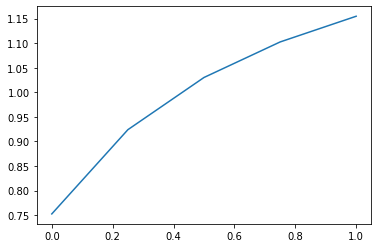

In [22]:
plt.plot(fminnnnn, [b/a for a,b in zip(fl_keV, fourth)])
#plt.plot(fminnnnn, fluxxxx)

In [24]:
dfgh = [ewq-rty for ewq, rty in zip(fl_keV, fourth)]
dfgh

[0.14151505034962747,
 0.05689580745942524,
 -0.027723435430777488,
 -0.11234267832097977,
 -0.19696192121118172]

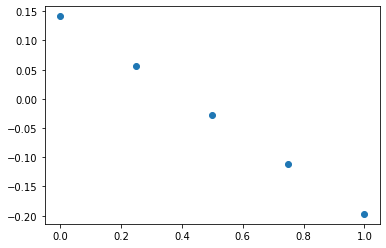

In [25]:
#plt.scatter([1,2,3,4,5], np.multiply(dfgh, [1,2,3,4,5]))
plt.scatter(fminnnnn, dfgh)

## Проработать:

1) Смысл `renorm`
2) `churazov` weights (для слабых источников)

## Figure 3

Reading from file (obsolete):

`fitlist = pd.read_csv("tspec_list.dat", header=None)[0].to_numpy().astype(float)`

`plt.scatter(np.linspace(0, 1, len(fitlist)), fitlist)`

Calculating one single-temperature fit (it was used for debugging):

`fitlist5 = single_T_fit_lines(0.50, 1.5, 4, 'Chandra', plot=True)`

In [203]:
#Tspec_lines_all[str(0.5)+'-'+str(1.5)] = single_T_fit_lines(0.5, 1.5, 3, telescope, plot = True)

Вычисляем всё необходимое в PyXspec:

In [206]:
#telescope = 'Chandra' 
telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1., 0.5, 1.0)
T_maxs = (0.5, 1.0, 2.0, 1.5, 3.0)

Tspec_lines_all ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    tspec_list = single_T_fit_lines(T_min, T_max, 21, telescope, plot = False)[0]
    Tspec_lines_all[str(T_min)+'-'+str(T_max)] = tspec_list

In [207]:
#print(Tspec_lines_all)
for key in Tspec_lines_all.keys():
    print(key, 'keV')
    print([f'{vl:.2f}' for vl in Tspec_lines_all[key]], '\n')

0.25-0.5 keV
['0.50', '0.48', '0.46', '0.44', '0.42', '0.40', '0.39', '0.38', '0.36', '0.35', '0.34', '0.33', '0.32', '0.31', '0.30', '0.29', '0.28', '0.27', '0.27', '0.26', '0.25'] 

0.5-1.0 keV
['1.00', '0.98', '0.95', '0.93', '0.90', '0.89', '0.87', '0.83', '0.79', '0.77', '0.74', '0.70', '0.66', '0.63', '0.60', '0.58', '0.56', '0.54', '0.52', '0.51', '0.50'] 

1.0-2.0 keV
['2.00', '1.69', '1.49', '1.34', '1.25', '1.18', '1.13', '1.11', '1.08', '1.06', '1.06', '1.05', '1.04', '1.03', '1.02', '1.02', '1.01', '1.01', '1.01', '1.00', '1.00'] 

0.5-1.5 keV
['1.50', '1.44', '1.41', '1.34', '1.27', '0.98', '0.62', '0.58', '0.56', '0.55', '0.53', '0.53', '0.53', '0.52', '0.52', '0.52', '0.51', '0.51', '0.51', '0.50', '0.50'] 

1.0-3.0 keV
['3.00', '2.02', '1.34', '1.15', '1.12', '1.07', '1.06', '1.05', '1.04', '1.04', '1.03', '1.02', '1.02', '1.01', '1.01', '1.01', '1.01', '1.01', '1.00', '1.00', '1.00'] 



Рисуем картинку:

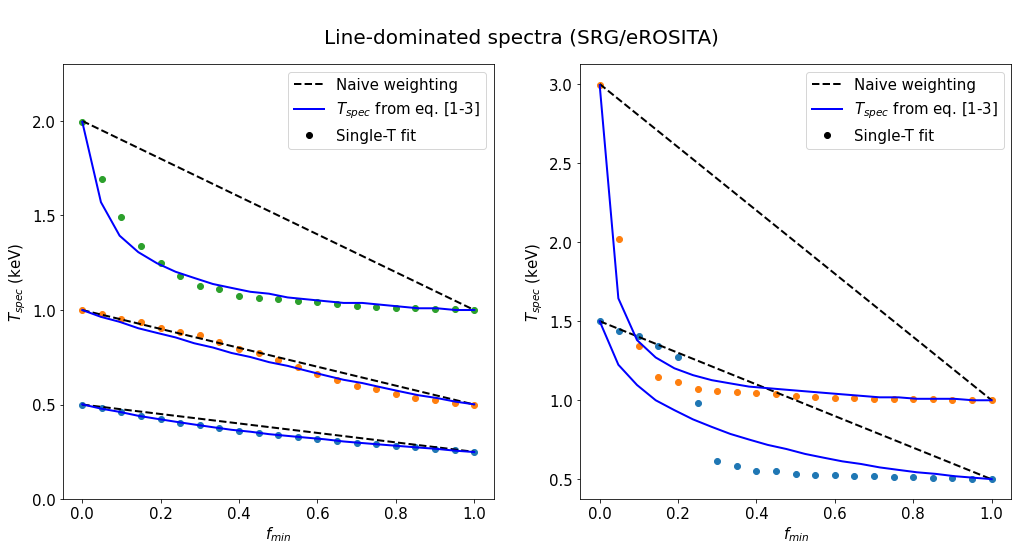

In [208]:
plt.figure(figsize=(17,8))
 
data__name = "data/stats_12.dat"

data = get_data(data__name, show_table=False)

plt.suptitle('\n' + 'Line-dominated spectra (' + telescope + ')', fontsize = 20)

plt.subplot(1,2,1)

T_mins = (0.25, 0.5, 1.)
T_maxs = (0.5, 1.0, 2.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    
plt.ylim(0, 2.3)

    
plt.subplot(1,2,2)

T_mins = (0.5, 1.0)
T_maxs = (1.5, 3.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # mean energy
    plot_Tspec_fmin(T_min, T_max, 21, data, naive=True, lstyle='-', cline='blue')
    plot_Tspec_fmin_details()
    
    #plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_10.dat", show_table=False), naive=False, lstyle='-', cline='red')
    
    # direct fit
    Tspec_list = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list)
    
#plt.savefig('Fig3_'+telescope+'_'+data__name[11:13]+'.png')
plt.show()

# CONTINUUM ONLY

To show list of `xspec` commands use `x.Plot.commands`.
If something is not plotting, try `x.Plot.commands=()`.

In [110]:
def get_Tspec_continuum_eq45(fminnn, Tmin, Tmax):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        alpha = 0.75
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq5([0.2, 0.3], 1.0, 2.0)
#print(bbb)

# calculating photon count rate for continuum

def c_T(T, T_left, T_right, telescope_name, plot):
    
    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=1024)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'

    # set model for fakeit
    
    mod = x.Model('phabs*apec')
    mod.setPars(0.01, T, 0.0, 0, 1)
    x.AllModels.show()
    
    if plot:
        x.Plot.device = '/xs'
    else:
        x.Plot.device = '/null'

    # fake spectrum
    fs = x.FakeitSettings(response = RMF_NAME, 
                               arf = ARF_NAME, 
                        background = '', 
                          exposure = '40000', 
                        correction = '', 
                      backExposure = '', 
                          fileName = 'fakeit.pha')
    x.AllData.fakeit(nSpectra = 1, 
                     settings = fs, 
                   applyStats = True,
                   filePrefix = "",
                      noWrite = True)

    x.AllData.ignore(f"**-{T_left} {T_right}-**")             # IMPORTANT !
    x.Plot.xAxis = "keV"
    #x.AllData.show()
    x.Plot("data")
    xVals = x.Plot.x()
    yVals = x.Plot.y()
    
    #plt.plot(xVals, yVals, label=str(T))
    #plt.xscale('log')
    #plt.legend()
    #plt.grid()
    #plt.show()

    return np.dot(xVals, yVals)    
    
#for i in range(0, 100):
#    ddd = c_T(i/10, 0.7, 10.0, 'Chandra')
#    print(ddd)

def get_Tspec_continuum_eq46(fminnn, Tmin, Tmax, alpha, telescope_name):
    
    # derive T_spec from given values 
    # of T_min, T_max and f_min
    
    Tspec = []
    
    for fmin in fminnn:
        
        temperatures = [Tmin, Tmax]
        weights = temperatures*0

        #alpha = 0.875
        
        weights = [temperatures[i]**(-alpha) for i in range(0, len(temperatures))]

        weights = np.multiply(weights, [fmin, (1-fmin)])
        
        c_T_min = c_T(Tmin, 0.7, 10.0, telescope_name, plot=False)
        c_T_max = c_T(Tmax, 0.7, 10.0, telescope_name, plot=False)
        
        weights = np.multiply(weights, [c_T_min, c_T_max])

        #print(weights)

        num = np.dot(weights, temperatures)
        denom = sum(weights)

        #print(num/denom)
        
        Tspec.append(num/denom)

    return Tspec

#bbb = get_Tspec_continuum_eq5([0.2, 0.3], 1.0, 2.0)
#print(bbb)

In [76]:
NNN=2

for l in range(0, NNN):

        f_minnn = 0.0+1/(NNN-1)*(l)
        f_maxxx = 1-f_minnn
        print(l, f_minnn, f_maxxx, f_minnn+f_maxxx)

0 0.0 1.0 1.0
1 1.0 0.0 1.0


### Mazotta-like fit
Single-T fit for mixture of 2 continuums (now working properly):

In [119]:
def single_T_fit_continuum(T_minnn, T_maxxx, N_fmins, telescope_name, T_left_cutoff, plot=False, Xplot=False):

    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list = []

    for l in range(0, N_fmins):

        f_minnn = 0.0 + 1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        #print(l, f_minnn)
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, 0.0, 0, 1, f_maxxx, T_maxxx, 0.0, 0, 1)
        x.AllModels.show()
        
        x.AllModels.calcFlux('0.7 10.0')
        #print("contn: ", mod.flux)
        flux_list.append(mod.flux[0])
        
        if plot:
            
            plt.figure(figsize=(15, 15))
            plt.suptitle(f'\n $T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn}, \ f_{{max}}={f_maxxx}$', fontsize = 25)
            plt.subplot(2,2,1)
            x.Plot("model")
            x.Plot.add = True
            #x.Plot.setID()
            xVals = x.Plot.x()
            modVals = x.Plot.model()
            yAdd1 = x.Plot.addComp(1)
            yAdd2 = x.Plot.addComp(2)
            #yAdd3 = x.Plot.addComp(3)
            #yAdd4 = x.Plot.addComp(4)
            #yAdd12 = [a+b for a,b in zip(yAdd1, yAdd2)]
            #yAdd34 = [c+d for c,d in zip(yAdd3, yAdd4)]
            plt.plot(xVals, modVals, linewidth = 3, label='initial model', color='black')
            plt.plot(xVals, yAdd1, linewidth = 2, linestyle = ":", 
                     label=f'$T_{{min}}={T_minnn} \ keV$, \n $f_{{min}}={f_minnn}$', color='red')
            plt.plot(xVals, yAdd2, linewidth = 2, linestyle = "--", 
                     label=f'$T_{{max}}={T_maxxx} \ keV$, \n $f_{{max}}={f_maxxx}$', color='green')
            #plt.plot(xVals, [c+d for c,d in zip(yAdd12, yAdd34)], label='sum')
            #plt.plot(xVals, yAdd3, label='3')
            #plt.plot(xVals, yAdd4, label='4')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            plt.legend(fontsize = 15, loc=1)
            add_plt_fancy()
            #plt.show()
            
        # fake spectrum
        fs = x.FakeitSettings(response = RMF_NAME, 
                                   arf = ARF_NAME, 
                            background = '', 
                              exposure = '40000', 
                            correction = '', 
                          backExposure = '', 
                              fileName = 'fakeit.pha')
        x.AllData.fakeit(nSpectra = 1, 
                         settings = fs, 
                       applyStats = True,
                       filePrefix = "",
                          noWrite = True)
        
        x.AllData.ignore(f"**-{T_left_cutoff} 10.-**")     # IMPORTANT !
        #x.Plot.xAxis = "keV"
        #x.Plot("data")
        x.AllData.show()
        #x.Plot("model data resid")
        #x.Plot("data")
        #x.Plot.add = True
        #x.Plot.background = False
        #bkg = x.Plot.backgroundVals()
        
        # fitting
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, 0.0, 0., 1)
        mod2fit(1).frozen = True
        
        x.Fit.nIterations = 100
        #x.Fit.statMethod = 'chi'
        # about statistic in xspec:
        # https://heasarc.gsfc.nasa.gov/xanadu/xspec/manual/node119.html
        x.Fit.query = 'yes'
        x.Fit.perform()
        #x.AllModels.show()
        #x.Fit.show()
        best_kT = mod2fit(2).values[0]
        #print(best_kT)
        tspec_list.append(best_kT)
        
        if plot:
            
            plt.subplot(2,2,2)
            x.Plot("data")
            x.Plot.xAxis = "keV"
            x.Plot.add = True
            xVals = x.Plot.x()
            yVals = x.Plot.y()
            modVals = x.Plot.model()
            #y1 = x.Plot.addComp(1)
            #y2 = x.Plot.addComp(2)
            #plt.plot(xVals, y1, label="APEC: Z=1")
            #plt.plot(xVals, [-aa for aa in y2], label="APEC: Z=0")
            #summa = [c+d for c,d in zip(y1, y2)]
            plt.plot(xVals, modVals, label='Best-fit model', color='black')
            xErrs = x.Plot.xErr()
            yErrs = x.Plot.yErr()
            plt.errorbar(xVals, yVals, yErrs, xErrs, 
                         fmt = "none", ecolor = "blue", label="data with errors")
            add_plt_fancy_cont()
            plt.xlabel("")
            
            #plt.subplot(4,2,6)
            x.Plot("resid")
            plt.subplot(2,2,4)
            xValsR = x.Plot.x()
            yValsR = x.Plot.y()
            xErrsR = x.Plot.xErr()
            yErrsR = x.Plot.yErr()
            plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                         fmt = "none", ecolor = "black", label="errors")
            plt.scatter(xValsR, [a-b for a,b in zip(yVals, modVals)], s=3, 
                        color='red', label='data minus \nbest fit')
            add_plt_fancy_cont()
            
            #finally
            plt.show()     
            
        x.Plot("model data resid")
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list
        
def add_plt_fancy_cont():
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.7, 1., 10.], [0.7, 1, 10])
    plt.legend(fontsize=15, loc=0)
    
#ccc, fluxccc = single_T_fit_continuum(0.25, 1.0, 3, 'Chandra', 0.7, plot=False, Xplot=False)
#print(ccc)
#print(fluxccc)

## Figure 4

Вычисляем всё необходимое:

In [72]:
#telescope = 'Chandra' 
telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 21)
T_spec = f_min*0

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

Tspec_from_eq46 ={}
Tspec_from_fit ={}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # Tspec from equations 4, 6
    tspec_list = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.73, telescope)
    Tspec_from_eq46[str(T_min)+'-'+str(T_max)] = tspec_list
    
    # Tspec from direct fit
    tspec_list_1 = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
    Tspec_from_fit[str(T_min)+'-'+str(T_max)] = tspec_list_1

In [73]:
for key in Tspec_from_eq46.keys():
    print(key, 'keV')
    print('Eqs. 4, 6:', [f'{vl:.2f}' for vl in Tspec_from_eq46[key]], '\n')
    print('Direct fit', [f'{vl:.2f}' for vl in Tspec_from_fit[key]], '\n')

0.25-1.0 keV
Eqs. 4, 6: ['1.00', '0.99', '0.98', '0.97', '0.96', '0.95', '0.94', '0.92', '0.91', '0.89', '0.87', '0.84', '0.82', '0.79', '0.75', '0.71', '0.65', '0.59', '0.51', '0.40', '0.25'] 

Direct fit ['0.99', '0.99', '0.98', '0.97', '0.97', '0.96', '0.95', '0.94', '0.92', '0.91', '0.89', '0.86', '0.84', '0.81', '0.77', '0.73', '0.67', '0.60', '0.51', '0.39', '0.25'] 

0.5-2.0 keV
Eqs. 4, 6: ['2.00', '1.95', '1.89', '1.84', '1.78', '1.72', '1.66', '1.60', '1.53', '1.46', '1.39', '1.32', '1.24', '1.16', '1.08', '0.99', '0.90', '0.81', '0.71', '0.61', '0.50'] 

Direct fit ['1.99', '1.95', '1.91', '1.86', '1.80', '1.76', '1.70', '1.64', '1.58', '1.51', '1.43', '1.34', '1.27', '1.19', '1.08', '1.00', '0.89', '0.79', '0.70', '0.60', '0.50'] 

1.0-4.0 keV
Eqs. 4, 6: ['4.00', '3.80', '3.61', '3.43', '3.25', '3.07', '2.90', '2.74', '2.58', '2.43', '2.28', '2.14', '2.00', '1.86', '1.72', '1.60', '1.47', '1.35', '1.23', '1.11', '1.00'] 

Direct fit ['3.97', '3.80', '3.64', '3.47', '3.31', '

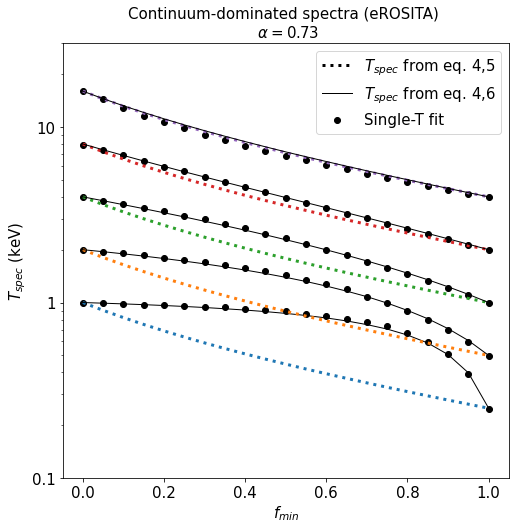

In [79]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # naive weighting
    #plt.plot(f_min, f_min*T_min+(1-f_min)*T_max, linestyle = '--', linewidth=2, color='black')
    
    # Tspec from equations 4, 5
    plt.plot(f_min, get_Tspec_continuum_eq45(f_min, T_min, T_max), linestyle = ':', linewidth = 3)

    # Tspec from equations 4, 6
    Tspec_list = Tspec_from_eq46[str(T_min)+'-'+str(T_max)]
    plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1)
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    
    # Tspec from direct fit
    Tspec_list1 = Tspec_from_fit[str(T_min)+'-'+str(T_max)]
    plt.scatter(np.linspace(0, 1, len(Tspec_list1)), Tspec_list1, color='black')
    
#plt.scatter(np.linspace(0, 1, len(T_spec)), T_spec, color='blue')   
    
plt.ylim(0.1, 30)
plt.yscale('log')
plt.xticks(size=15)
plt.yticks([0.1, 1, 10], [0.1, 1, 10], size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec}$ (keV)', fontsize = 15)
plt.title('Continuum-dominated spectra ('+telescope+') \n $\\alpha=0.73$', fontsize = 15)

handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Naive weighting', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='$T_{spec}$ from eq. 4,5', color='black', linestyle=':', linewidth=3)
dots_f = Line2D([], [], label='$T_{spec}$ from eq. 4,6', color='black', linestyle='-', linewidth=1)
dots_T = Line2D([], [], label='Single-T fit', color='black', marker='.', linewidth=0, markersize=12)
handles.extend([line_e, dots_f, dots_T])
plt.legend(handles=handles, fontsize=15)

plt.savefig('Fig4_'+str(telescope)+'.png')
plt.show()

Let's try to find the value of $\alpha$ at which $T_{sl}$ from equations 4,6 is the closest to $T_{spec}$ from direct fit. Observations by SRG/eROSITA considered. See eq. (13) from Mazzotta et al. (2004): https://arxiv.org/pdf/astro-ph/0404425.pdf

$\Delta=\frac{1}{N} \sum_{T_1, T_2} \sqrt{\left(\frac{T_{\mathrm{sl}} - T_{\mathrm{spec}}}{T_{\mathrm{spec}}}\right)^2}$

In [64]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

deltas = []
alphas = np.linspace(0.750, 0.950, 21)

#[0.875, 0.900, 0.925, 0.950, 0.975, 1.000]
#[0.750, 0.775, 0.800, 0.825, 0.850, 0.875, 0.900]

f_min = np.linspace(0, 1, 21)

for a in alphas:

    delta_sum = 0
    N_deltasum = 0

    T_mins = (0.25, 0.5, 1.0, 2.0, 4.0)
    T_maxs = (1.0,  2.0, 4.0, 8.0, 16.0)

    #T_min = 0.5
    #T_max = 2.0

    for T_min, T_max in list(zip(T_mins, T_maxs)):

        # Tspec from equations 4, 6
        T_sl = get_Tspec_continuum_eq46(f_min, T_min, T_max, a, telescope)
        #print(T_sl)

        # Tspec from direct fit
        T_spec = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
        #print(T_spec)

        #print(T_spec)
        difference = [Ta-Tb for Ta, Tb in zip(T_sl, T_spec)]
        #print(difference)
        terms = [num/denom for num, denom in zip(difference, T_spec)]
        #print(term)
        terms2 = [t**2 for t in terms]
        #print(terms2)
        sqrterms2 = [np.sqrt(tt) for tt in terms2]
        
        delta_term = np.sum(sqrterms2)

        delta_sum = delta_sum + delta_term
        
        N_deltasum = N_deltasum + len(f_min)
        
        print(N_deltasum)
        
    Delta = delta_sum/N_deltasum
    
    print(a, Delta)

    deltas.append(Delta)
    
#print(deltas)

21
42
63
84
105
0.75 0.030568923483703606
21
42
63
84
105
0.76 0.029788671707673603
21
42
63
84
105
0.77 0.028554473022577062
21
42
63
84
105
0.78 0.027786175391161273
21
42
63
84
105
0.79 0.027421341482519332
21
42
63
84
105
0.8 0.02660066794741242
21
42
63
84
105
0.8099999999999999 0.02647557905674063
21
42
63
84
105
0.82 0.026473125221825624
21
42
63
84
105
0.83 0.026424594254372283
21
42
63
84
105
0.84 0.02591987054067653
21
42
63
84
105
0.85 0.026122778943819768
21
42
63
84
105
0.86 0.026699078477088235
21
42
63
84
105
0.87 0.02600997629121812
21
42
63
84
105
0.88 0.026191423607691604
21
42
63
84
105
0.89 0.02727474351705195
21
42
63
84
105
0.8999999999999999 0.028953406603638144
21
42
63
84
105
0.9099999999999999 0.03025336672371244
21
42
63
84
105
0.9199999999999999 0.03140223122513563
21
42
63
84
105
0.9299999999999999 0.032883812328148514
21
42
63
84
105
0.94 0.034002511445559234
21
42
63
84
105
0.95 0.03616690997738973


In [65]:
alphas_CH = alphas
deltas_CH = deltas

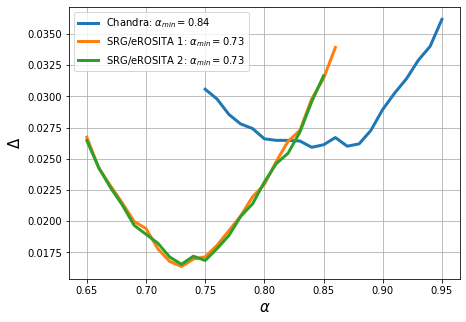

In [67]:
plt.figure(figsize=(7,5))
plt.plot(alphas_CH, deltas_CH, linewidth=3, label='Chandra: $\\alpha_{min} =$'+str(alphas_CH[np.argmin(deltas_CH)]))
plt.plot(list1, list2, linewidth=3, label='SRG/eROSITA 1: $\\alpha_{min} =$'+str(list1[np.argmin(list2)]))
plt.plot(alphas_ER, deltas_ER, linewidth=3, label='SRG/eROSITA 2: $\\alpha_{min} =$'+str(alphas_ER[np.argmin(deltas_ER)]))
plt.xlabel('$\\alpha$', fontsize=15)
plt.ylabel('$\\Delta$', fontsize=15)#, rotation = 'horizontal')
plt.legend()
plt.grid()
#plt.savefig('delta_alpha_ER.png')
plt.show()

We can see that $\Delta$ reaches its minimum at $\alpha=0.73$ (for SRG/eROSITA observations). 

# REALISTIC METALLICITIES

In [73]:
def single_T_realistic(T_minnn, T_maxxx, N_fmins, abund, telescope_name, plot=False, Xplot=False):

    x.AllData.removeDummyrsp()
    x.AllData.dummyrsp(lowE=0.1, highE=50.0, nBins=100)
    x.Xset.addModelString("APEC_TRACE_ABUND", "0")
    
    if telescope_name == 'Chandra':
        RMF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.rmf' 
        ARF_NAME = 'telescopes/chandra/djs50.ugc3957_v05.arf' 
    elif telescope_name == 'SRG/eROSITA':
        RMF_NAME = 'telescopes/erosita/erosita_pirmf_v20210719.rmf'
        ARF_NAME = 'telescopes/erosita/tm1_arf_open_000101v02.fits'
    
    if Xplot:
        x.Plot.device = "/xs"
    else:
        x.Plot.device = '/null'

    tspec_list = []
    flux_list=[]

    for l in range(0, N_fmins):

        f_minnn = 0.0+1/(N_fmins-1)*(l)
        f_maxxx = 1-f_minnn
        
        # set model for fakeit
        mod = x.Model('phabs*(const*apec+const*apec)')
        mod.setPars(0.01, f_minnn, T_minnn, abund, 0, 1, f_maxxx, T_maxxx, abund, 0, 1)
        x.AllModels.show()
        #x.Plot.show()
        
        x.AllModels.calcFlux('0.7 10.0')
        #print("reals: ", mod.flux)
        flux_list.append(mod.flux[0])
        
        if plot:
            
            plt.figure(figsize=(15, 15))
            plt.suptitle(f'\n $T_{{min}}={T_minnn} \ keV, \ T_{{max}}={T_maxxx} \ keV, \ f_{{min}}={f_minnn}, \ f_{{max}}={f_maxxx}$', fontsize = 25)
            plt.subplot(2,2,1)
            x.Plot("model")
            x.Plot.add = True
            #x.Plot.setID()
            xVals = x.Plot.x()
            modVals = x.Plot.model()
            yAdd1 = x.Plot.addComp(1)
            yAdd2 = x.Plot.addComp(2)
            plt.plot(xVals, modVals, linewidth = 3, label='initial model', color='black')
            plt.plot(xVals, yAdd1, linewidth = 2, linestyle = ":", 
                     label=f'$T_{{min}}={T_minnn} \ keV$, \n $f_{{min}}={f_minnn}$', color='red')
            plt.plot(xVals, yAdd2, linewidth = 2, linestyle = "--", 
                     label=f'$T_{{max}}={T_maxxx} \ keV$, \n $f_{{max}}={f_maxxx}$', color='green')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            plt.legend(fontsize = 15, loc=1)
            add_plt_fancy_real()
            #plt.show()
        
        # fake spectrum
        fs = x.FakeitSettings(response = RMF_NAME, 
                                   arf = ARF_NAME, 
                            background = '', 
                              exposure = '40000', 
                            correction = '', 
                          backExposure = '', 
                              fileName = 'fakeit.pha')
        x.AllData.fakeit(nSpectra = 1, 
                         settings = fs, 
                       applyStats = True,
                       filePrefix = "",
                          noWrite = True)
        
        x.AllData.ignore("**-0.1 10.-**")             # IMPORTANT !
        x.Plot("data")
        x.AllData.show()
        
        # fitting
        mod2fit = x.Model("phabs*apec")
        mod2fit.setPars(0.01, 1.0, abund, 0., 1)
        mod2fit(1).frozen = True
        
        x.Fit.nIterations = 100
        #x.Fit.statMethod = 'chi'
        x.Fit.query = 'yes'
        x.Fit.perform()
        best_kT = mod2fit(2).values[0]
        #print(best_kT)
        tspec_list.append(best_kT)
        
        if plot:
            
            plt.subplot(2,2,3)
            x.Plot("model")
            modVals = x.Plot.model()
            xVals = x.Plot.x()
            #yVals = x.Plot.addComp(1)
            #plt.plot(xVals, yVals, label="data")
            plt.plot(xVals, modVals, label="Best-fit", color='black')
            plt.xscale('log')
            plt.yscale('log')
            plt.xlim(0.1, 14)
            plt.ylim(0.01, 8)
            add_plt_fancy_real()
            #plt.title("Best-fit model")
            #plt.show()
        
        if plot:
            
            plt.subplot(2,2,2)
            x.Plot("data")
            x.Plot.xAxis = "keV"
            x.Plot.add = True
            xVals = x.Plot.x()
            yVals = x.Plot.y()
            modVals = x.Plot.model()
            plt.plot(xVals, modVals, label='MODEL', color='red')
            xErrs = x.Plot.xErr()
            yErrs = x.Plot.yErr()
            plt.errorbar(xVals, yVals, yErrs, xErrs, 
                         fmt = "none", ecolor = "black", label="data with errors")
            add_plt_fancy_real()
            plt.xlabel("")
            
            #plt.subplot(4,2,6)
            x.Plot("resid")
            plt.subplot(2,2,4)
            xValsR = x.Plot.x()
            yValsR = x.Plot.y()
            xErrsR = x.Plot.xErr()
            yErrsR = x.Plot.yErr()
            plt.errorbar(xValsR, yValsR, yErrsR, xErrsR, 
                         fmt = "none", ecolor = "black", label="errors")
            plt.scatter(xValsR, [a-b for a,b in zip(yVals, modVals)], s=3, 
                        color='red', label='data minus \nbest fit')
            add_plt_fancy_real()
            
            #finally
            plt.show()     
            
        x.Plot("model data resid")
        #x.Plot.commands=()
        x.AllData.clear()

    return tspec_list, flux_list

def add_plt_fancy_real():
    plt.xlabel(x.Plot.labels()[0], fontsize = 15)
    plt.ylabel(x.Plot.labels()[1], fontsize = 15)
    plt.title(x.Plot.labels()[2], fontsize = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.grid()
    plt.xscale('log')
    plt.xticks([0.1, 1., 10.], [0.1, 1, 10])
    plt.legend(fontsize=15, loc=0)
    
#aaa, aaa1 = single_T_realistic(1.0, 3.0, 3, 1, 'Chandra', plot=False, Xplot=False)
#print(aaa)
#print(aaa1)

In [120]:
#telescope = 'Chandra' 
telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 21)
T_spec = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

Tspec_continuum_fit_fig5 = {}
Tspec_cont_all_fig5 = {}
single_T_fit_all_fig5 = {}
Tspec_lines_all_fig5 = {}  

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)] = get_Tspec_continuum_eq46(f_min, T_min, T_max, 0.73, telescope)
    Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)[0]
    
    if T_min == 1.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.1, telescope, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 0.1, telescope, plot = False, Xplot=False)[0]
    if T_min == 2.0:
        single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), 0.3, telescope, plot=False, Xplot=False)[0]
        Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), 0.3, telescope, plot = False, Xplot=False)[0]


In [134]:
def print_values(TSPEC_LISTS):
    
    for item in TSPEC_LISTS:
   
        for key in item.keys():
            print(key, 'keV')
            print([f'{vl:.2f}' for vl in item[key]], '\n')
            
print_values([Tspec_cont_all_fig5, single_T_fit_all_fig5])

#print(Tspec_cont_all)
#for key in Tspec_cont_all_fig5.keys():
#    print(key, 'keV')
#    print([f'{vl:.2f}' for vl in Tspec_cont_all_fig5[key]], '\n')
    
#for key in single_T_fit_all_fig5.keys():
#    print(key, 'keV')
#    print([f'{vl:.2f}' for vl in single_T_fit_all_fig5[key]], '\n')

1.0-3.0 keV
['3.00', '2.88', '2.77', '2.66', '2.55', '2.44', '2.33', '2.23', '2.12', '2.02', '1.92', '1.82', '1.73', '1.63', '1.54', '1.44', '1.35', '1.26', '1.17', '1.09', '1.00'] 

2.0-6.0 keV
['6.00', '5.67', '5.37', '5.08', '4.81', '4.56', '4.33', '4.10', '3.88', '3.68', '3.49', '3.31', '3.13', '2.97', '2.81', '2.66', '2.52', '2.38', '2.25', '2.12', '2.00'] 

1.0-3.0 keV
['2.99', '2.84', '2.68', '2.54', '2.39', '2.25', '2.11', '1.97', '1.78', '1.51', '1.34', '1.26', '1.20', '1.14', '1.12', '1.10', '1.07', '1.05', '1.04', '1.02', '1.00'] 

2.0-6.0 keV
['6.00', '5.61', '5.23', '4.84', '4.57', '4.28', '4.05', '3.79', '3.57', '3.36', '3.17', '2.99', '2.83', '2.68', '2.54', '2.40', '2.32', '2.21', '2.13', '2.06', '2.00'] 



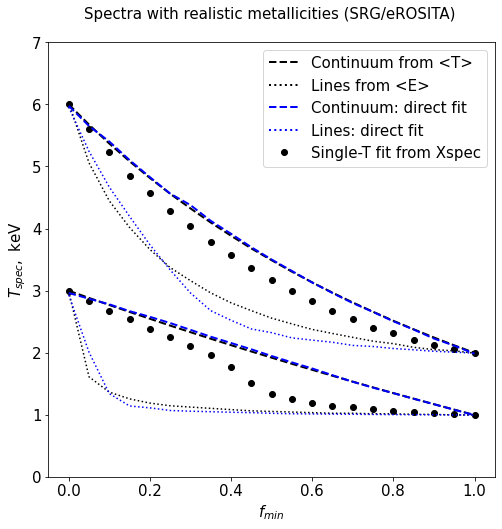

In [141]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 21)
Tspec_list3 = f_min*0
iks = f_min*0

T_mins = (1.0, 2.0)
T_maxs = (3.0, 6.0)

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # line-dominated from <E>
    #plot_Tspec_fmin(T_min, T_max, 20, get_data("data/stats_12.dat", show_table=False), naive=False, lstyle=':', cline='black')
    for i in range(0, len(f_min)):
        Tspec_list3[i] = get_Tspec_lines(f_min[i], T_min, T_max, get_data("data/stats_12.dat", show_table=False))
    plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
    
    # line-dominated from direct fit
    Tspec_list4 = Tspec_lines_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list4, linestyle=':', color='blue')
    
    # continuum from eq. 4,6
    Tspec_list1 = Tspec_cont_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
    
    # continuum from direct fit
    Tspec_list5 = Tspec_continuum_fit_fig5[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list5, linestyle = '--', linewidth = 2, color = 'blue')
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_all_fig5[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list2, color='black')
    #Tspec_list = Tspec_cont_all[str(T_min)+'-'+str(T_max)]
    #plt.scatter(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black')
    #plt.plot(np.linspace(0, 1, len(Tspec_list)), Tspec_list, color='black', linewidth=1) 
    
handles, labels = plt.gca().get_legend_handles_labels()
line_n = Line2D([], [], label='Continuum from <T>', color='black', linestyle='--', linewidth=2)
line_e = Line2D([], [], label='Lines from <E>', color='black', linestyle=':', linewidth=2)
line_n1 = Line2D([], [], label='Continuum: direct fit', color='blue', linestyle='--', linewidth=2)
line_e1 = Line2D([], [], label='Lines: direct fit', color='blue', linestyle=':', linewidth=2)
dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
handles.extend([line_n, line_e, line_n1, line_e1, dots_f])
plt.legend(handles=handles, fontsize=15)
    
plt.ylim(0, 7)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$f_{min}$', fontsize = 15)
plt.ylabel('$T_{spec},$ keV', fontsize = 15)
plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
plt.savefig('Fig5_eROSITA.png')
plt.show()

## Finally, x( $f_{line}$ )

Figure 6.

In [165]:
telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

f_min = np.linspace(0, 1, 11)

T_mins = (0.5, 1., 2., 3., 0.5, 1., 2., 3., 0.5, 1., 2., 3.)
T_maxs = (1. , 2., 4., 6., 1.5, 3., 6., 9., 2. , 4., 8., 12.)

metallicity = 0.1

Tspec_lines_f6 = {}
Tspec_cont_f6 = {}
single_T_fit_f6 = {}

Flux_lines_f6 = {}
Flux_cont_f6 = {}
Flux_fit_f6 = {}

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    Tspec_cont_f6[str(T_min)+'-'+str(T_max)], Flux_cont_f6[str(T_min)+'-'+str(T_max)] = single_T_fit_continuum(T_min, T_max, len(f_min), telescope, 0.7, plot=False, Xplot=False)
    single_T_fit_f6[str(T_min)+'-'+str(T_max)], Flux_fit_f6[str(T_min)+'-'+str(T_max)] = single_T_realistic(T_min, T_max, len(f_min), metallicity, telescope, plot=False, Xplot=False)
    Tspec_lines_f6[str(T_min)+'-'+str(T_max)], Flux_lines_f6[str(T_min)+'-'+str(T_max)] = single_T_fit_lines(T_min, T_max, len(f_min), metallicity, telescope, plot = False, Xplot=False)
    print(str(T_min)+'-'+str(T_max)+' done')
    

0.5-1.0 done
1.0-2.0 done
2.0-4.0 done
3.0-6.0 done
0.5-1.5 done
1.0-3.0 done
2.0-6.0 done
3.0-9.0 done
0.5-2.0 done
1.0-4.0 done
2.0-8.0 done
3.0-12.0 done


In [99]:
#print(Tspec_cont_all)
for key in Flux_lines_f6.keys():
    print(key, 'keV')
    print([f'{vl*10**10:.2f}' for vl in Flux_lines_f6[key]], '\n')
    
for key in Flux_cont_f6.keys():
    print(key, 'keV')
    print([f'{vl*10**10:.2f}' for vl in Flux_cont_f6[key]], '\n')
    
for key in Flux_fit_f6.keys():
    print(key, 'keV')
    print([f'{vl*10**10:.2f}' for vl in Flux_fit_f6[key]], '\n')

0.5-1 keV
['6.03', '6.04', '6.04', '6.05', '6.05', '6.05', '6.06', '6.06', '6.07', '6.07', '6.08', '6.08', '6.08', '6.09', '6.09', '6.10', '6.10', '6.11', '6.11', '6.11', '6.12'] 

1-2 keV
['1.87', '2.07', '2.28', '2.49', '2.70', '2.91', '3.12', '3.32', '3.53', '3.74', '3.95', '4.16', '4.37', '4.57', '4.78', '4.99', '5.20', '5.41', '5.62', '5.82', '6.03'] 

2-4 keV
['1.42', '1.44', '1.47', '1.49', '1.51', '1.53', '1.55', '1.58', '1.60', '1.62', '1.64', '1.67', '1.69', '1.71', '1.73', '1.75', '1.78', '1.80', '1.82', '1.84', '1.87'] 

3-6 keV
['1.35', '1.36', '1.37', '1.37', '1.38', '1.39', '1.40', '1.40', '1.41', '1.42', '1.42', '1.43', '1.44', '1.44', '1.45', '1.46', '1.47', '1.47', '1.48', '1.49', '1.49'] 

0.5-1.5 keV
['2.75', '2.92', '3.08', '3.25', '3.42', '3.59', '3.76', '3.93', '4.10', '4.26', '4.43', '4.60', '4.77', '4.94', '5.11', '5.28', '5.44', '5.61', '5.78', '5.95', '6.12'] 

1-3 keV
['1.49', '1.72', '1.95', '2.17', '2.40', '2.63', '2.86', '3.08', '3.31', '3.54', '3.76', '3

In [82]:
for key in Flux_lines_f6.keys():
    print(key, 'keV')
    print([vl*10**10 for vl in Flux_lines_f6[key]], '\n')
    print([vl*10**10 for vl in Flux_cont_f6[key]], '\n')
    print([(vl1 + vl2)*10**10 for vl1, vl2 in zip(Flux_lines_f6[key], Flux_cont_f6[key])], '\n')
    print([vl*10**10 for vl in Flux_fit_f6[key]], '\n')

1.0-3.0 keV
[0.49786985276977896, 1.2544783485745636, 2.0110868443793493] 

[9.00039717698963, 6.055493443604504, 3.1105897102193776] 

[9.49826702975941, 7.309971792179067, 5.121676554598727] 

[9.498267029759413, 7.309971792179067, 5.121676554598725] 

2.0-6.0 keV
[1.3537513888555401, 1.609571976818585, 1.86539256478163] 

[13.233751789335273, 9.874111832438684, 6.5144718755420925] 

[14.587503178190813, 11.48368380925727, 8.379864440323724] 

[14.587503178190811, 11.483683809257265, 8.379864440323724] 



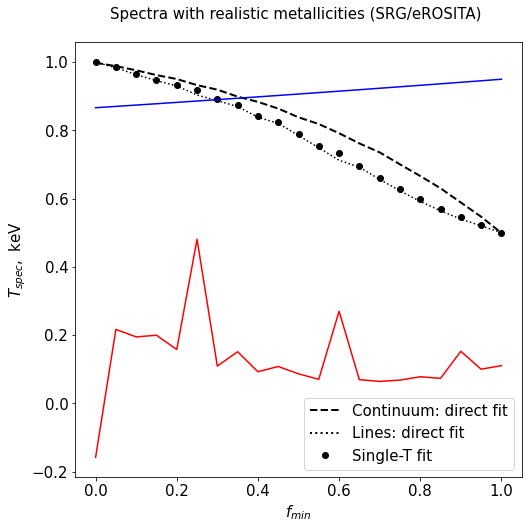

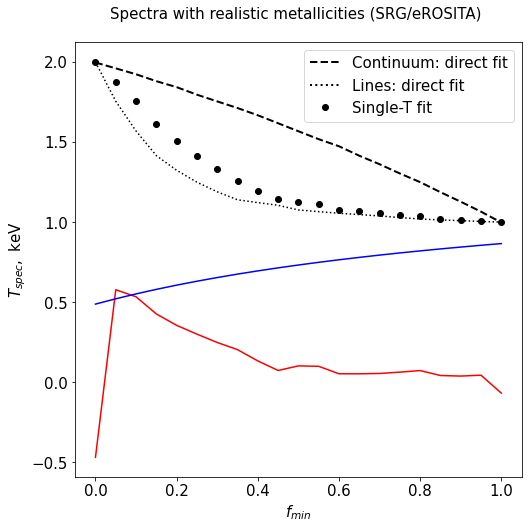

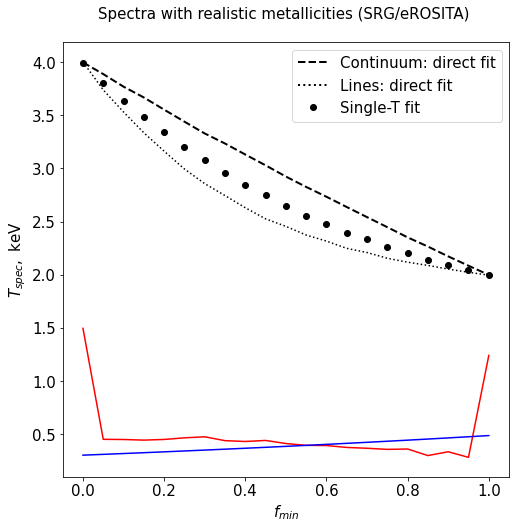

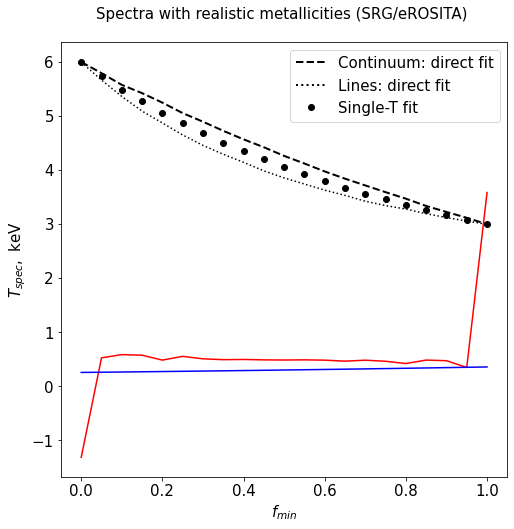

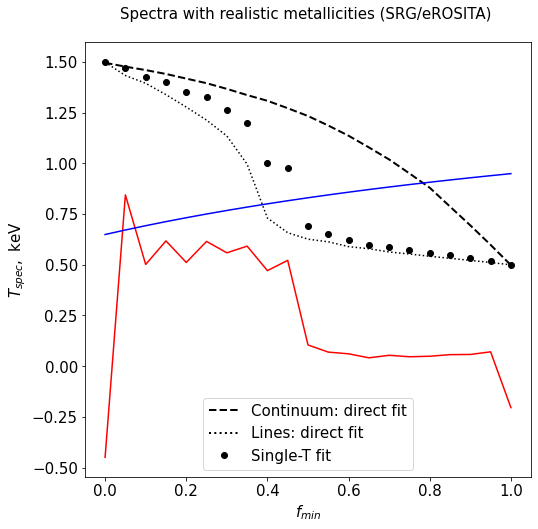

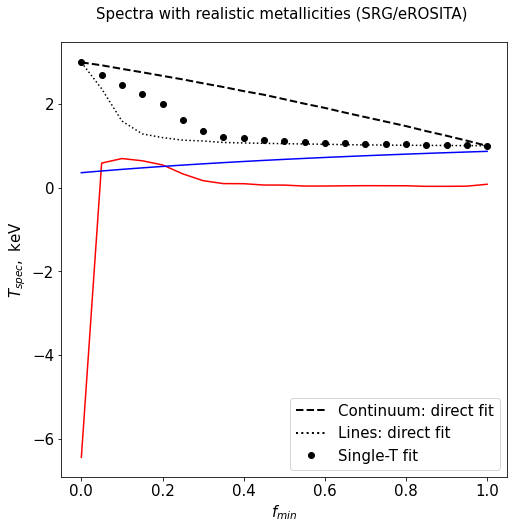

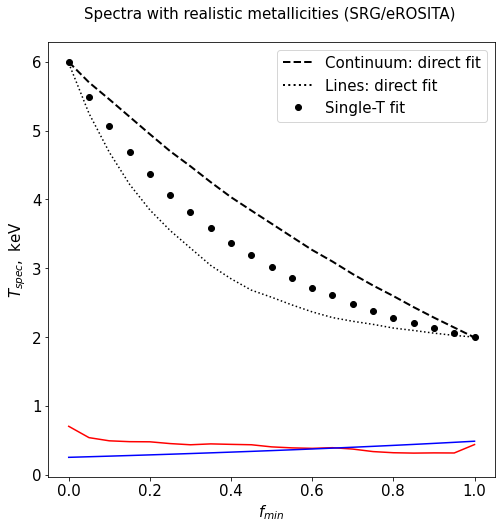

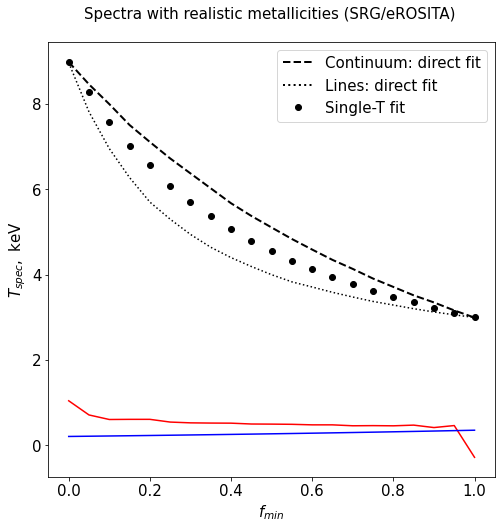

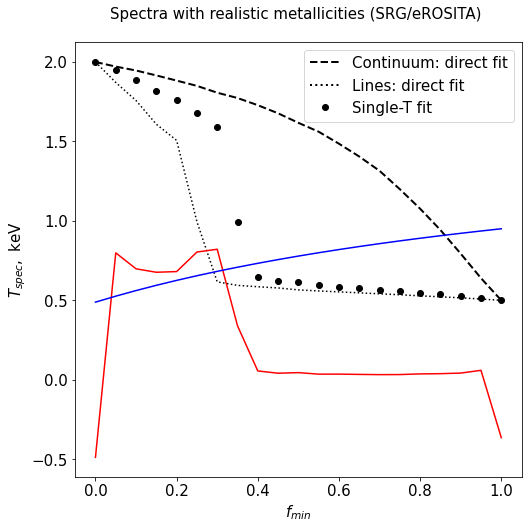

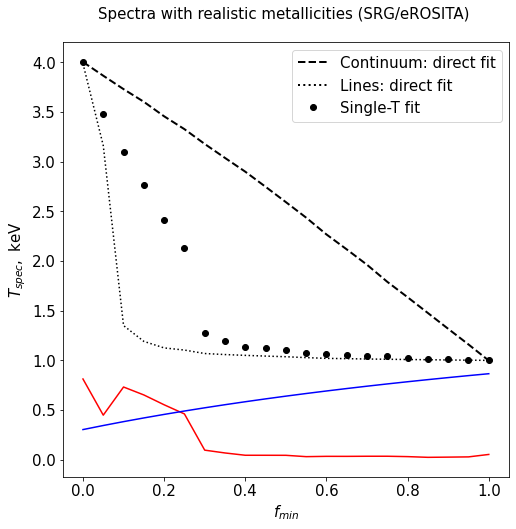

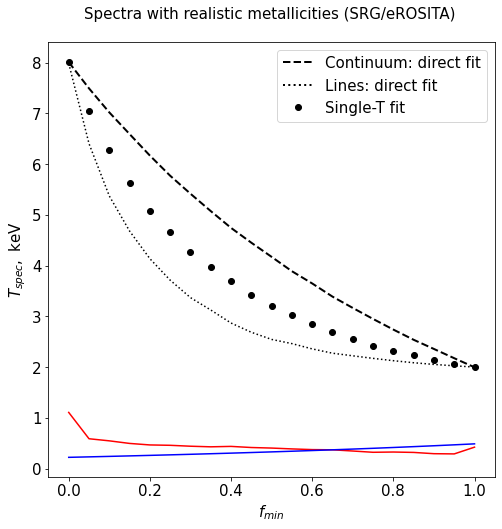

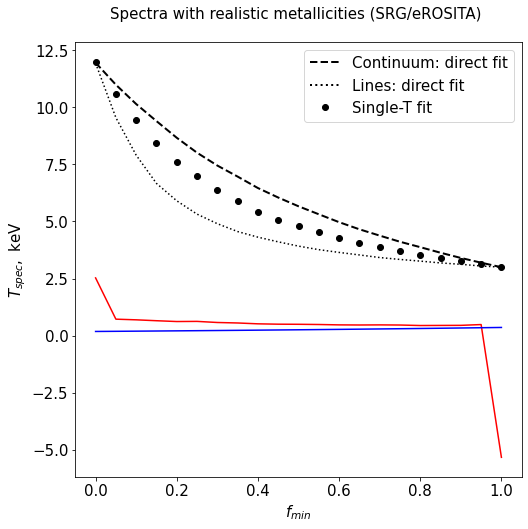

In [161]:
for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    plt.figure(figsize=(8,8))
    
    # continuum
    Tspec_list1 = Tspec_cont_f6[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list1, linestyle = '--', linewidth = 2, color = 'black')
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_f6[str(T_min)+'-'+str(T_max)]
    plt.scatter(f_min, Tspec_list2, color='black')
    
    #line-dominated
    Tspec_list3 = Tspec_lines_f6[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list3, linestyle=':', color='black')
    
    num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
    denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
    iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]
    
    Flux_list1 = Flux_cont_f6[str(T_min)+'-'+str(T_max)]
    Flux_list2 = Flux_fit_f6[str(T_min)+'-'+str(T_max)]
    Flux_list3 = Flux_lines_f6[str(T_min)+'-'+str(T_max)]
    
    num_fline = Flux_list3
    denom_fline = [Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
    #denom_fline1 = Flux_list2
    fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]
    
    plt.plot(f_min, iks, color='red')
    plt.plot(f_min, fline, color='blue')
    
    
    handles, labels = plt.gca().get_legend_handles_labels()
    line_n = Line2D([], [], label='Continuum: direct fit', color='black', linestyle='--', linewidth=2)
    line_e = Line2D([], [], label='Lines: direct fit', color='black', linestyle=':', linewidth=2)
    dots_f = Line2D([], [], label='Single-T fit', color='black', marker='.', linestyle='None', markersize=12)
    handles.extend([line_n, line_e, dots_f])
    plt.legend(handles=handles, fontsize=15)
    
    #plt.ylim(0, 7)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('$f_{min}$', fontsize = 15)
    plt.ylabel('$T_{spec},$ keV', fontsize = 15)
    plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
    #plt.savefig('Fig5_eROSITA.png')
    plt.show()

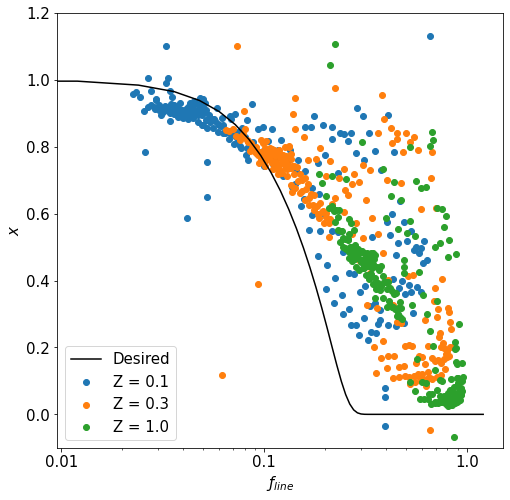

In [180]:
plt.figure(figsize=(8,8))

#telescope = 'Chandra' 
#telescope = 'SRG/eROSITA'

#iks_all = []
#fline_all = []

for T_min, T_max in list(zip(T_mins, T_maxs)):
    
    # continuum
    Tspec_list1 = Tspec_cont_f6[str(T_min)+'-'+str(T_max)]
    Flux_list1 = Flux_cont_f6[str(T_min)+'-'+str(T_max)]
    
    # realistic metallicities
    Tspec_list2 = single_T_fit_f6[str(T_min)+'-'+str(T_max)]
    Flux_list2 = Flux_fit_f6[str(T_min)+'-'+str(T_max)]
    
    #line-dominated
    Tspec_list3 = Tspec_lines_f6[str(T_min)+'-'+str(T_max)]
    Flux_list3 = Flux_lines_f6[str(T_min)+'-'+str(T_max)]
    
    num_iks = [tsp - tli for tsp, tli in zip(Tspec_list2, Tspec_list3)]
    denom_iks = [tco - tli for tco, tli in zip(Tspec_list1, Tspec_list3)]
    iks = [numx/denomx for numx, denomx in zip(num_iks, denom_iks)]
    
    num_fline = Flux_list3
    denom_fline = [Fli + Fco for Fli, Fco in zip(Flux_list3, Flux_list1)]
    fline = [numf/denomf for numf, denomf in zip(num_fline, denom_fline)]
    
    #iks_all.append(iks)
    #fline_all.append(fline)
    
    #plt.scatter(fline, iks)
    
plt.scatter(fline_all_1, iks_all_1, label = 'Z = 0.1')
plt.scatter(fline_all_2, iks_all_2, label = 'Z = 0.3')
plt.scatter(fline_all_3, iks_all_3, label = 'Z = 1.0')

#for ii in np.linspace(0, 1.2, 101):
ii = np.linspace(0, 1.2, 101)
plt.plot(ii, universal_function(ii, 0.19, 0.25, 1.00), color='black', linestyle='-', label = 'Desired')

#handles, labels = plt.gca().get_legend_handles_labels()
#line_n = Line2D([], [], label='Continuum', color='black', linestyle='--', linewidth=2)
#line_e = Line2D([], [], label='Lines', color='black', linestyle=':', linewidth=2)
#dots_f = Line2D([], [], label='Single-T fit from Xspec', color='black', marker='.', linestyle='None', markersize=12)
#handles.extend([line_n, line_e, dots_f])
#plt.legend(handles=handles, fontsize=15)

plt.legend(fontsize=15)
plt.xscale('log')
plt.ylim(-0.1, 1.2)
plt.xticks([0.01, 0.1, 1.0], [0.01, 0.1, 1.0], size=15)
plt.yticks(size=15)
plt.xlabel('$ƒ_{line}$', fontsize = 15)
plt.ylabel('$x$', fontsize = 15)
#plt.title('Spectra with realistic metallicities ('+telescope+') \n', fontsize = 15)
plt.savefig('Fig6_'+telescope+'.png')
plt.show()

In [144]:
def universal_function(flin, delta1, delta2, beta):
    
    return np.exp( -(flin/delta1)**(2*beta) ) * np.exp( -(flin/delta2)**(8) )

In [106]:
iks_all_3 = iks_all
fline_all_3 = fline_all
print(iks_all_3)
print(fline_all_3)

[[-0.158107080668366, 0.21664369214995347, 0.1946238848926153, 0.19963598426984655, 0.15783476537916027, 0.48077592468292185, 0.10919301238708487, 0.15125406643964173, 0.09261737708586291, 0.10804623739761016, 0.08650659354787196, 0.07047781096332341, 0.2698953555721343, 0.06930130475562336, 0.0642799186732556, 0.06805333079307122, 0.07795963640996688, 0.07323077803175382, 0.15257935935564465, 0.1000681455158029, 0.11059397408326889], [-0.4681532189156694, 0.5779202380571133, 0.5338542641076967, 0.4267741875393804, 0.35575999463370256, 0.30078544447148853, 0.2487510009025885, 0.20403043119801714, 0.13372295870483591, 0.07411458429504418, 0.10265017664379159, 0.09990192527445205, 0.05345673731723451, 0.05316746730252811, 0.05536146111710507, 0.06361015766178828, 0.07350609660380808, 0.042563436517897554, 0.03910051409416084, 0.044569750949538245, -0.06731358964928365], [1.4965923114036792, 0.45306557770770695, 0.45134412846433686, 0.4455936056128222, 0.4518605015523616, 0.46703698090843

In [102]:
iks_all_2 = iks_all
fline_all_2 = fline_all
print(iks_all_2)
print(fline_all_2)

[[-1.4512241302193103, 0.7053286456949909, 0.7827959789680062, 0.33883667190525074, 0.37764648960253844, 0.6157254187469686, 0.29018040882959545, 0.3153063777002424, 0.23147274735552395, 0.24244033321049066, 0.2017714563772151, 0.4059067287883628, 0.2144245290423513, 0.197920871045054, 0.181685882981113, 0.18835903238345997, 0.31829426950998296, 0.3050707119827184, 0.2766616888050346, 0.2564689385398294, 0.20124954174317147], [0.9767695902867017, 0.7346697982807502, 0.6873412607370692, 0.6948917760621823, 0.6403788694044041, 0.5870077619193484, 0.5387731375345223, 0.4832099085134985, 0.402645085033403, 0.32620661208729074, 0.27486976972160776, 0.2742577752465343, 0.20493089593592806, 0.20630315131899335, 0.2048609668212062, 0.15417745870094945, 0.17450955065420062, 0.17067473274482964, 0.1497575895288426, 0.1264063646158514, -0.04709412440536264], [-1.6708375949387269, 0.731296405920211, 0.7749791394020071, 0.7723130588572505, 0.7456571609557914, 0.736166566291045, 0.7431960239880546, 

In [97]:
iks_all_1 = iks_all
fline_all_1 = fline_all
print(iks_all_1)
print(fline_all_1)

[[0.052979377380457854, 1.6276025102995786, 0.8948732749066872, 0.5373734010855653, 0.600032311125168, 0.7841852225067653, 0.47620560577894355, 0.5110948452173476, 0.6379859451374226, 0.3996156762338013, 0.5761085768241424, 0.5189864359291779, 0.38538523284097226, 0.5487655555027329, 0.4927475680588271, 0.5002076602851833, 0.4817228583120122, 0.49615733056334443, 0.5179888886452677, 0.4626078706269261, -0.3091070832549464], [1.346032255890574, 0.8584769377146112, 0.8538407449812215, 0.8206455603761512, 0.7914006192193944, 0.7598136605438756, 0.7286752360429894, 0.6754557951294918, 0.6589776229725474, 0.5969990901516328, 0.5476313697263683, 0.545556362680283, 0.48382835618014547, 0.42329526196149836, 0.41989508813228327, 0.3658493957576323, 0.3826532059801468, 0.3227179885394534, 0.33410069808206827, 0.2810948159764272, 0.07806250096834273], [0.890968572595942, 0.9297531196429438, 0.8977427965185628, 0.8997791215697655, 0.9272905134329902, 0.9419127501646966, 0.909515367158287, 0.896276

In [ ]:




    
    print(iks)
    plt.scatter(f_min, iks)

plt.xscale('log')
plt.show()

plt.figure(figsize=(8,8))

tspec_list = single_T_fit_lines(T_min, T_max, 21, telescope, plot = False)[0]
    Tspec_lines_all[str(T_min)+'-'+str(T_max)] = tspec_list
    
    
Tspec_list4 = Tspec_lines_all[str(T_min)+'-'+str(T_max)]
    plt.plot(f_min, Tspec_list3, linestyle=':', color='black')